# Tremor signal on BP network
2020.09.21 Kurama Okubo

Update versions
- version:
- Julia 1.8.1 <- 1.4.1
- SeisIO 1.2.1 <- 1.1.0
 

In [1]:
using SeisIO, Printf, Plots, Dates, JLD2

In [2]:
#---Parameters---#
datadir = "../seisremoveeq_demo/ex_download_data_removaldemo_OUTPUT/seismicdata/seisremoveeq"
fodir = "./"

kurtosis_threshold=3.0 # this is defined when computing kurtosis
stalta_threshold=3.0 # this is defined when computing STA/LTA

trace_ylim = (-2.2e-5, 2.2e-5)
#----------------#

(-2.2e-5, 2.2e-5)

In [3]:
tday=15 # you can choose from 1 to 21 day

comp = 1 #1(vertical), 2, 3

filename = @sprintf("BP.EADB.40.SP%d__2016-01-%02dT00:00:00__2016-01-%02dT00:00:00__sp%d.seisio.jld2", comp, tday, tday+1, comp)

figpath = joinpath(fodir, "figure")
sacpath = joinpath(fodir, "sac")

# make output directory
!ispath(sacpath) && mkdir(sacpath)
!ispath(figpath) && mkdir(figpath)

filepath = joinpath(datadir, filename)

"../seisremoveeq_demo/ex_download_data_removaldemo_OUTPUT/seismicdata/seisremoveeq/BP.EADB.40.SP1__2016-01-15T00:00:00__2016-01-16T00:00:00__sp1.seisio.jld2"

In [4]:
S = jldopen(filepath, "r") do fi
    fi["S"]
end
S.misc

Dict{String, Any} with 11 entries:
  "SensorDescription" => "L-22D VERTICAL"
  "ClockDrift"        => 0.002
  "data_fraction"     => 0.940966
  "removal_fraction"  => 0.0590295
  "endDate"           => 32503680000000000
  "kurtsis_trace"     => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  …
  "noisesignal"       => Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1…
  "startDate"         => 1311202800000000
  "dlerror"           => 0
  "raw_trace"         => Float32[7.26659f-7, 6.72431f-7, 6.19098f-7, 5.73851f-7…
  "stalta_trace"      => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  …

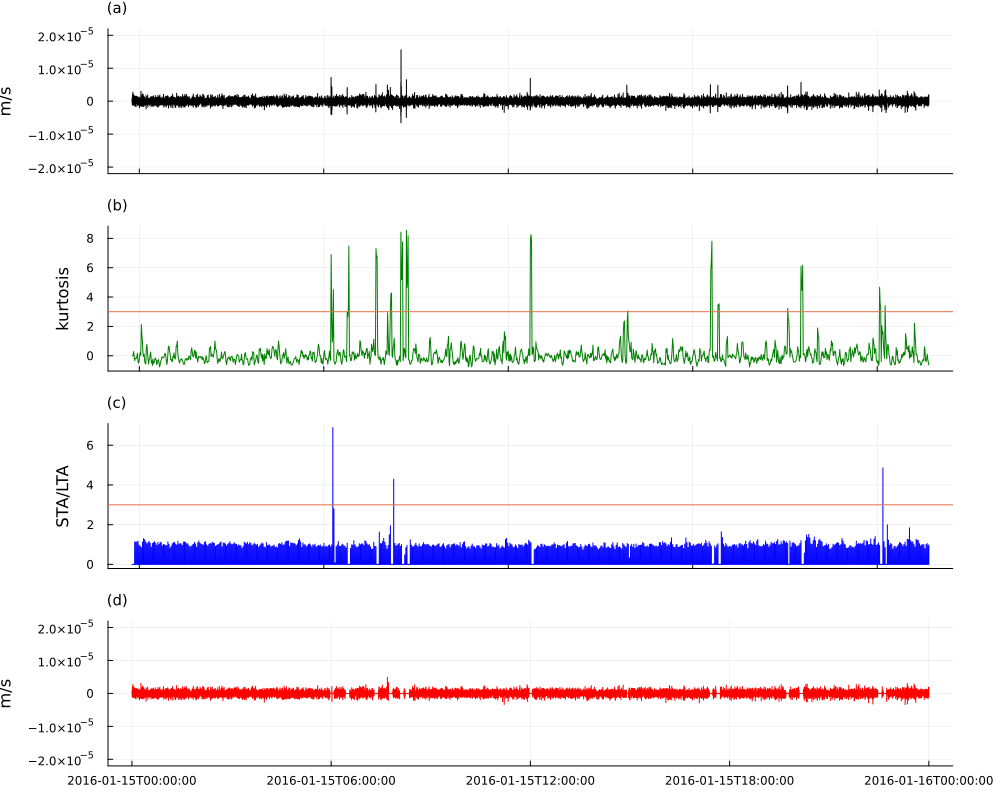

In [5]:
plotspan = 100
kurtosis_plotspan=60*20 # kurtosis is comupted every 60 second * 20Hz 
tvec = collect(0:1/S.fs:length(S.x)/S.fs)
tvec_date = u2d.(tvec .+ S.t[1,2]*1e-6) 
p1=plot(tvec_date[1:plotspan:end], S.misc["raw_trace"][1:plotspan:end], color=:black,xformatter=_->"",  label="", ylabel="m/s")
p1=plot!(p1,xformatter=_->"", title = "(a)", titleloc = :left, titlefont = font(10), ylim=trace_ylim)
p2=plot(tvec_date[kurtosis_plotspan:kurtosis_plotspan:end], S.misc["kurtsis_trace"][kurtosis_plotspan:kurtosis_plotspan:end], color=:green, xformatter=_->"",  label="", ylabel="kurtosis")
p2=hline!(p2, [kurtosis_threshold], label="", xformatter=_->"", title = "(b)", titleloc = :left, titlefont = font(10))
p3=plot(tvec_date[1:plotspan:end], S.misc["stalta_trace"][1:plotspan:end], color=:blue, xformatter=_->"", label="", ylabel="STA/LTA")
p3=hline!(p3, [stalta_threshold], label="", xformatter=_->"", title = "(c)", titleloc = :left, titlefont = font(10))
p4=plot(tvec_date[1:plotspan:end], S.x[1:plotspan:end], color=:red, label="", ylabel="m/s")
p4 = plot!(title = "(d)", titleloc = :left, titlefont = font(10), ylim=trace_ylim)

# plot all
plot(p1, p2, p3, p4, layout=(4, 1), link=:x)
plot!(size=(1000,800), right_margin=10Plots.mm)

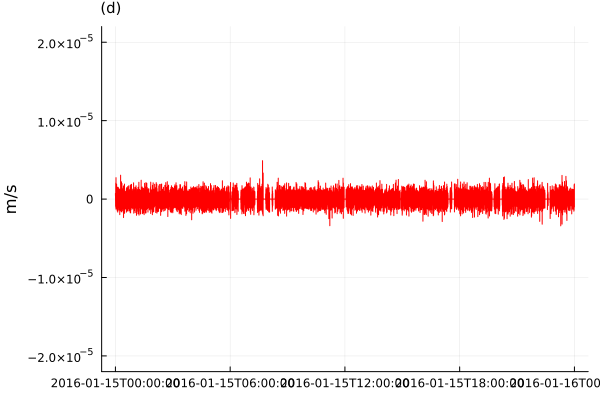

In [6]:
p1=plot(tvec_date[1:plotspan:end], S.misc["raw_trace"][1:plotspan:end], color=:black,xformatter=_->"",  label="", ylabel="m/s")
p1=plot!(p1,xformatter=_->"", title = "(a)", titleloc = :left, titlefont = font(10), ylim=trace_ylim)
p2=plot(tvec_date[kurtosis_plotspan:kurtosis_plotspan:end], S.misc["kurtsis_trace"][kurtosis_plotspan:kurtosis_plotspan:end], color=:green, xformatter=_->"",  label="", ylabel="kurtosis")
p2=hline!(p2, [kurtosis_threshold], label="", xformatter=_->"", title = "(b)", titleloc = :left, titlefont = font(10))
p3=plot(tvec_date[1:plotspan:end], S.misc["stalta_trace"][1:plotspan:end], color=:blue, xformatter=_->"", label="", ylabel="STA/LTA")
p3=hline!(p3, [stalta_threshold], label="", xformatter=_->"", title = "(c)", titleloc = :left, titlefont = font(10))
p4=plot(tvec_date[1:plotspan:end], S.x[1:plotspan:end], color=:red, label="", ylabel="m/s")
p4 = plot!(title = "(d)", titleloc = :left, titlefont = font(10), ylim=trace_ylim)


In [7]:
savefig(joinpath(figpath, filename*".png"))

# save raw data and removed data in sac format
S_raw = deepcopy(S)
S_kurtosis = deepcopy(S)
S_stalta = deepcopy(S)
S_raw.x = S_raw.misc["raw_trace"]
S_kurtosis.x = S_raw.misc["kurtsis_trace"]
S_stalta.x = S_raw.misc["stalta_trace"]
writesac(S_raw, fname=joinpath(sacpath, filename[1:end-5]*"_raw.sac"))
writesac(S_kurtosis, fname=joinpath(sacpath, filename[1:end-5]*"_kurtosis.sac"))
writesac(S_stalta, fname=joinpath(sacpath, filename[1:end-5]*"_stalta.sac"))
writesac(S, fname=joinpath(sacpath, filename[1:end-5]*"_removed.sac"))
